<a href="https://colab.research.google.com/github/ramism16/opencv-image-processing/blob/master/RamisMustafa_22428_DIPLab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import modules and mounting drive

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Edge Detection using Sobet and Prewitt operators

Reading and printing the original image

Building Image: 


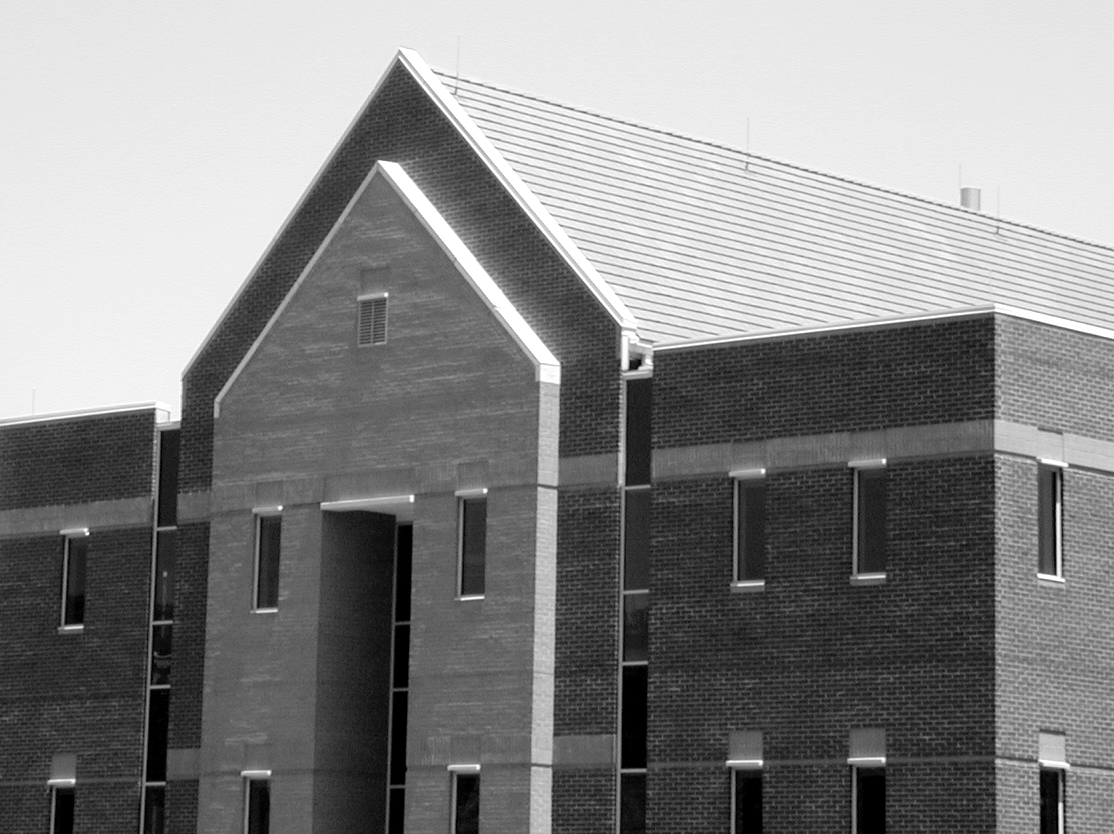

In [0]:
building = cv2.imread("/content/drive/My Drive/Ramis/Academics/Semester 6/Digital Image Processing/Labs/Lab 8/building.tif", 0)
print("Building Image: ")
cv2_imshow(building)

Defining and using Sobel operator kernel

Sobel edge-detected image:



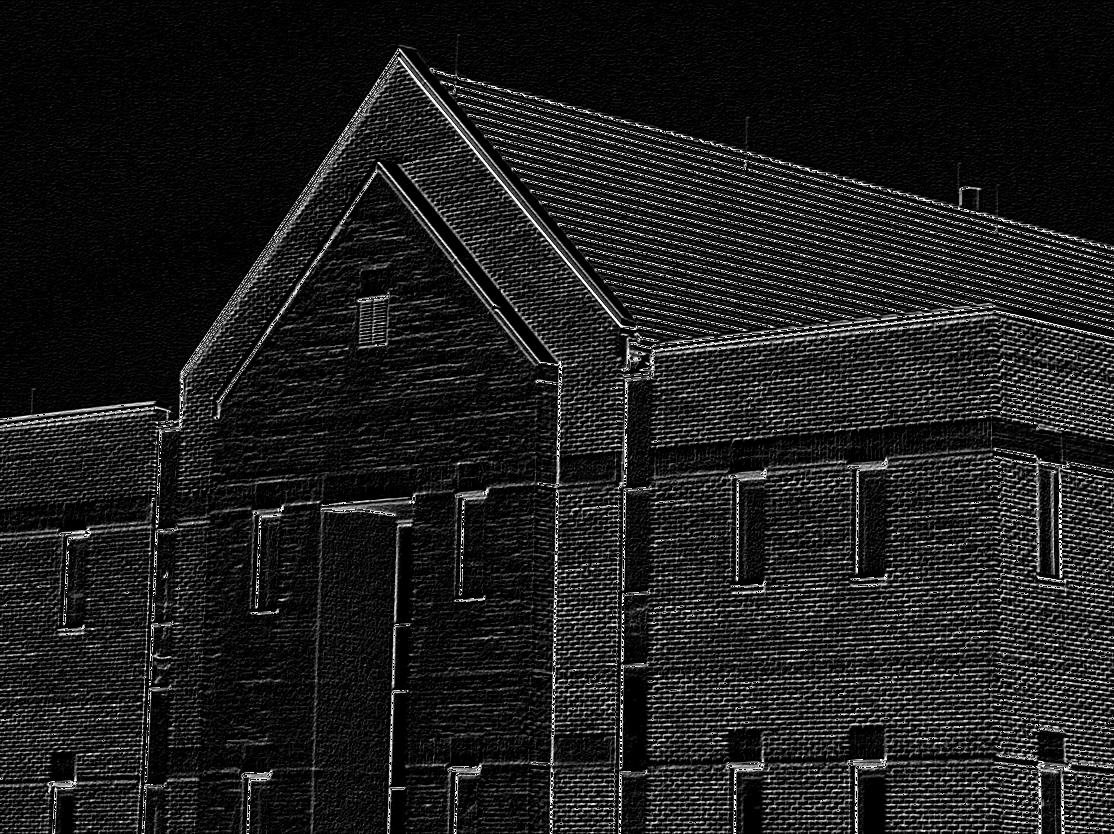

In [0]:
"""
#kernel numpy arrays
kernelSobelX = np.array([[-1,0,1], [-2,0,2], [-1,0,1]], dtype = "int")
kernelSobelY = np.array([[-1,2,-1], [0,0,0], [1,2,1]], dtype = "int")
"""

#180-degree rotation of the matrix given in the manual
kernelSobelX = np.array([[1,2,-1], [0,0,-2], [1,0,-1]], dtype = "int")
kernelSobelY = np.array([[1,2,1], [0,0,0], [-1,-2,-1]], dtype = "int")

#applying the kernel to the building image
#sobel = sobelX + sobelY
buildingSobel = cv2.filter2D(building, -1, kernelSobelX) + cv2.filter2D(building, -1, kernelSobelY)

#showing the sobel operator detected edges
print("Sobel edge-detected image:\n")
cv2_imshow(buildingSobel)

```
COMMENT ON cv2.filter2D(image, destinationDepth, kernel)
destinationDepth is the image data type.
for example, CV_8U is 8-bit unsigned image
ddepth negative will result in the source image data type
```

Defining and using the Prewitt operator kernel

Prewitt edge-detected image:



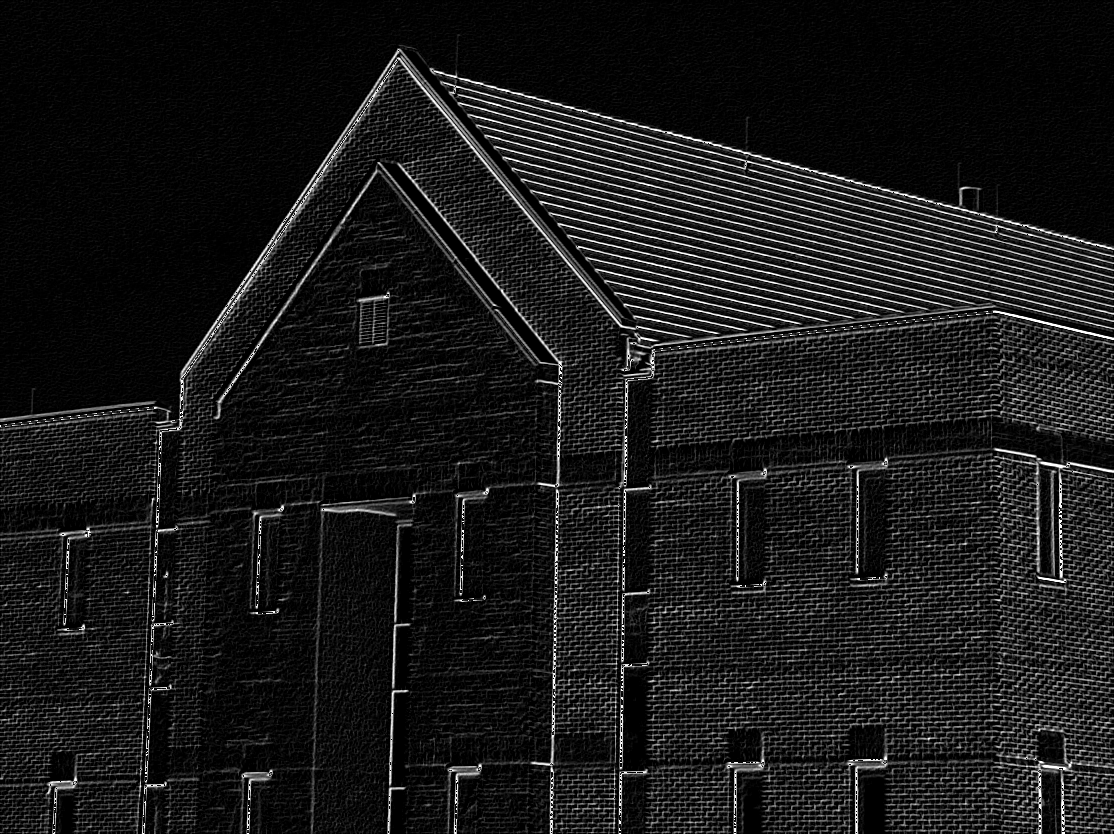

In [0]:
#kernel numpy arrays
kernelPrewittX = np.array([[1,0,-1], [1,0,-1], [1,0,-1]], dtype = "int")
kernelPrewittY = np.array([[1,1,1], [0,0,0], [-1,-1,-1]], dtype = "int")

#applying kernel to the building image
#prewitt = prewittX + prewittY
buildingPrewitt = cv2.filter2D(building, -1, kernelPrewittX) + cv2.filter2D(building, -1, kernelPrewittY)

#showing the Prewitt operator edge detected images
print("Prewitt edge-detected image:\n")
cv2_imshow(buildingPrewitt)

Smoothing the image and then applying the kernels

Sobel blurred: 



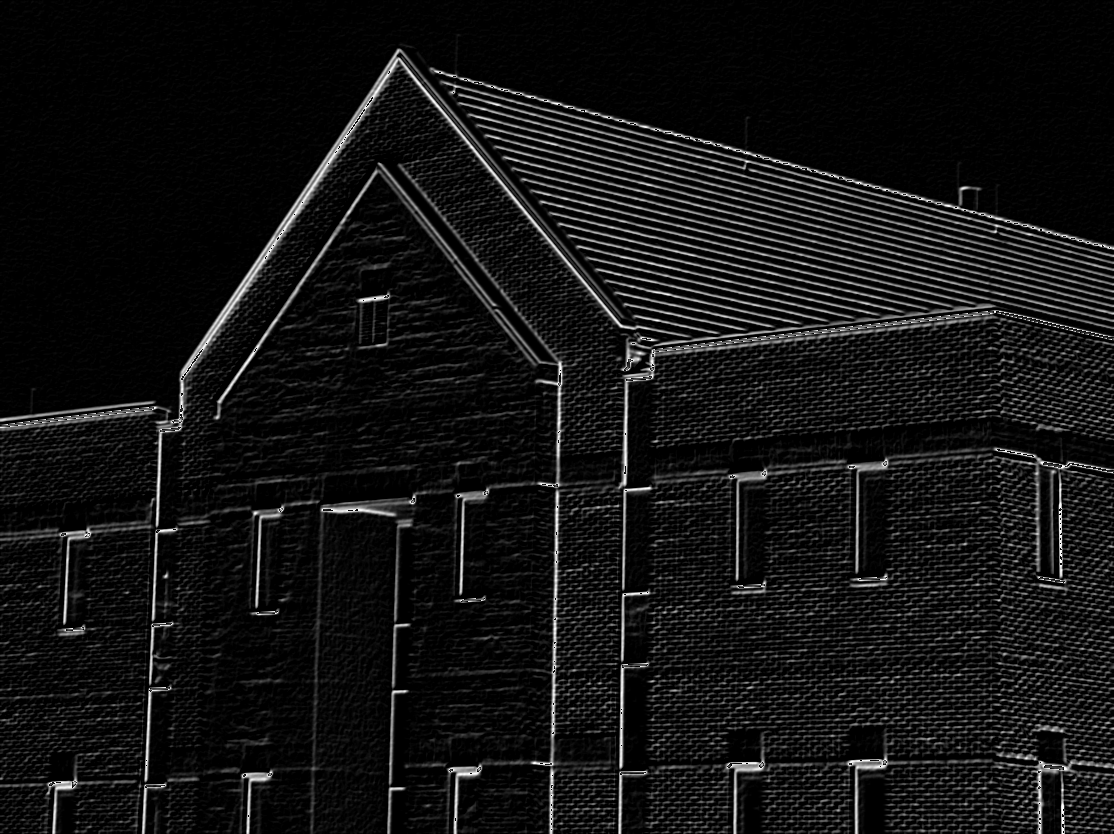


Prewitt blurred: 



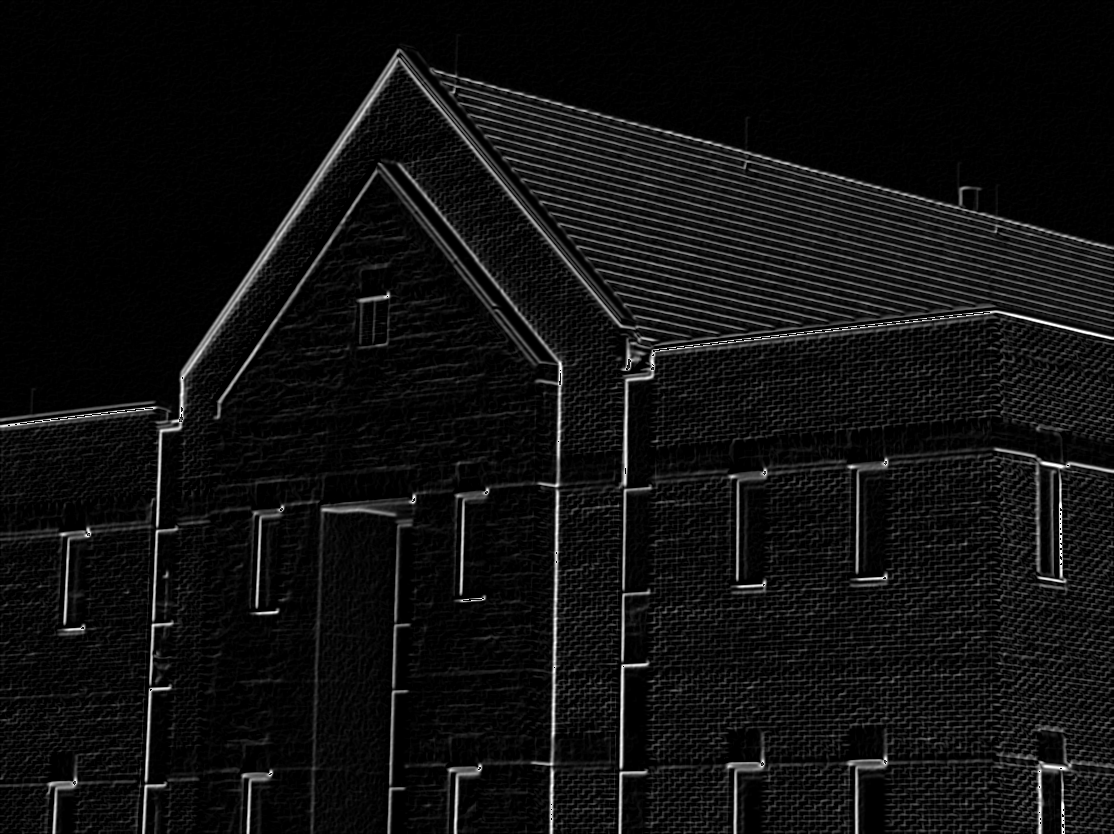

In [0]:
#smoothing the image using Guassian Blur
buildingSmooth = cv2.GaussianBlur(building, (5,5), 0)
#buildingSmooth = cv2.medianBlur(building, 5)

#applying the same kernels again
sobelBlurred = cv2.filter2D(buildingSmooth, -1, kernelSobelX) + cv2.filter2D(buildingSmooth, -1, kernelSobelY)
prewittBlurred = cv2.filter2D(buildingSmooth, -1, kernelPrewittX) + cv2.filter2D(buildingSmooth, -1, kernelPrewittY)

#print the edge detected resulting images
print("Sobel blurred: \n")
cv2_imshow(sobelBlurred)

print("\nPrewitt blurred: \n")
cv2_imshow(prewittBlurred)

```
In my observation, the Sobel-operator edge detection seems to be more efficient than Prewitt-operator 
edge detection because of its better edge detection in shadowy areas (brighter and more edges in the final image)

Gaussian-blurring the image works better for the Sobel operator which will oversharpen the image in 
areas where edges are concentrated, but (visually) does not work well with the Prewitt-operator.

Median-blurring the image will visually worsen the edge detection with both the operators.
```

## Canny Edge Detector

Reading CT.tif and applying Sobel and Prewitt operator edge detection

CT Scan Image:



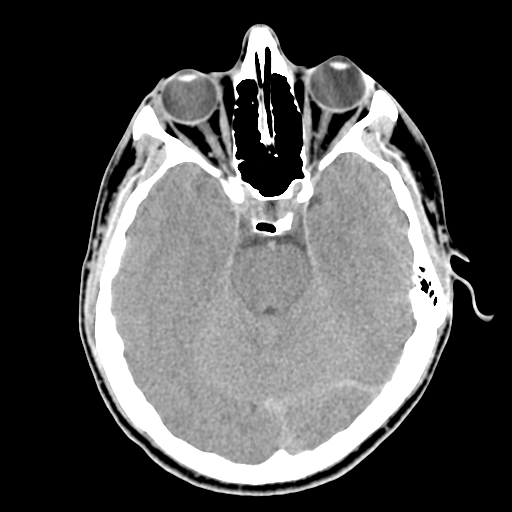


CT Scan Sobel Image:



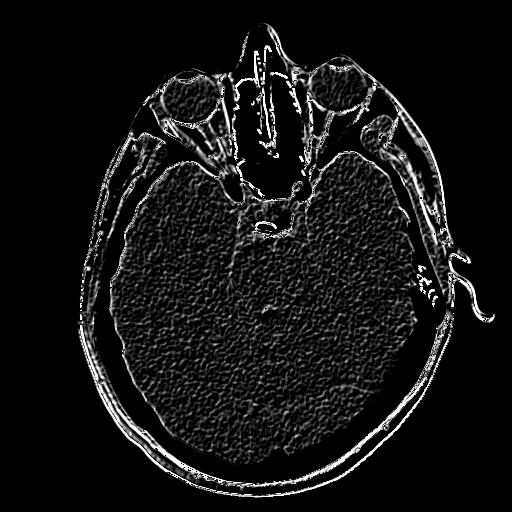


CT Scan Prewitt Image:



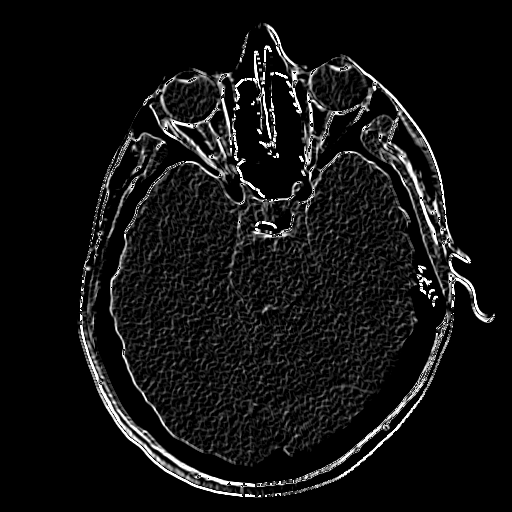

In [0]:
#Reading and printing the CT Scan image
ct = cv2.imread("/content/drive/My Drive/Ramis/Academics/Semester 6/Digital Image Processing/Labs/Lab 8/CT.tif", 0)
print("CT Scan Image:\n")
cv2_imshow(ct)

#applying sobel
ctSobel = cv2.filter2D(ct, -1, kernelSobelX) + cv2.filter2D(ct, -1, kernelSobelY)

#applying prewitt
ctPrewitt = cv2.filter2D(ct, -1, kernelPrewittX) + cv2.filter2D(ct, -1, kernelPrewittY)

print("\nCT Scan Sobel Image:\n")
cv2_imshow(ctSobel)

print("\nCT Scan Prewitt Image:\n")
cv2_imshow(ctPrewitt)

Experimenting with the Canny edge detector function

Threshold1: 50, Threshold2: 160

Threshold1: 80, Threshold2: 150

Threshold1: 140, Threshold2: 210



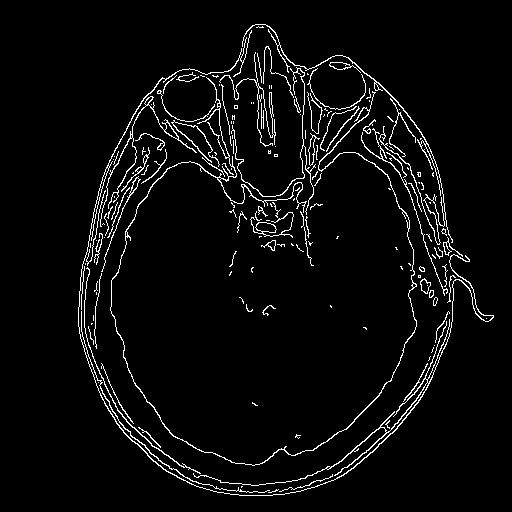

In [0]:
#cv2.canny(image,threshold1,threshold2,...apertureSize), apertureSize = size of sobel kernel (3, 5 or 7)
ctCanny = cv2.Canny(ct, 50, 160)
print("Threshold1: 50, Threshold2: 160\n")
#cv2_imshow(ctCanny)

ctCanny = cv2.Canny(ct, 80, 150)
print("Threshold1: 80, Threshold2: 150\n")
#cv2_imshow(ctCanny)

#After experimenting on for 20-30 minutes
ctCanny = cv2.Canny(ct, 119.5, 207.5)
print("Threshold1: 119.5, Threshold2: 207.5\n")
cv2_imshow(ctCanny)

Applying Canny edge detection to fingerprint.tif


Original fingerprint image: 



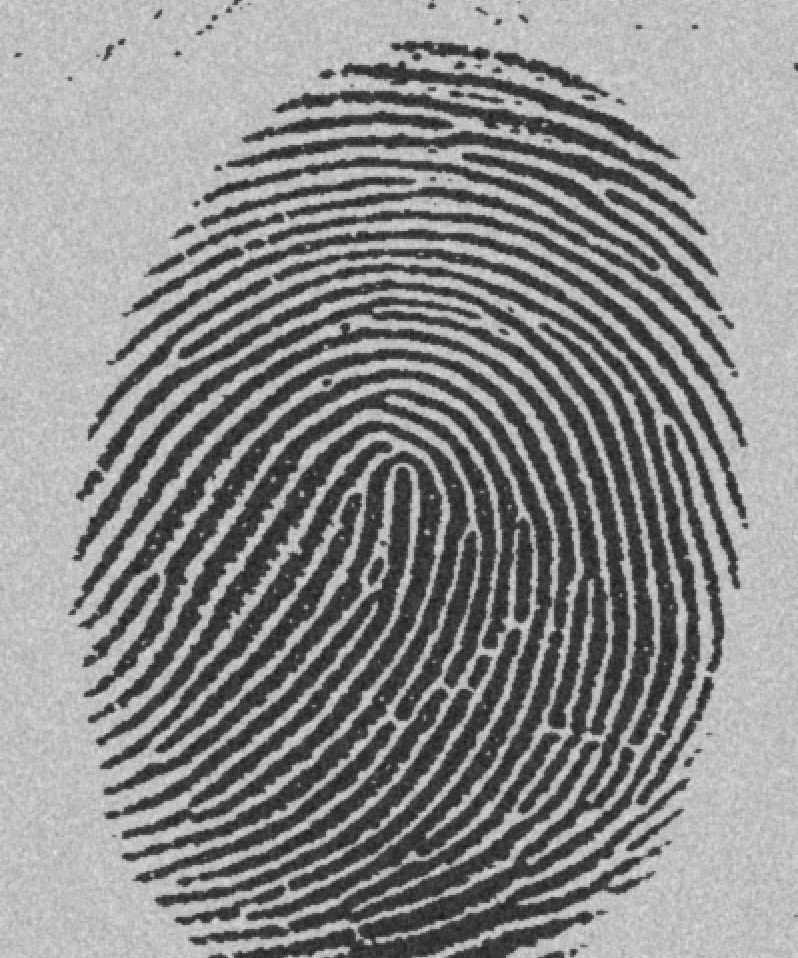


Original fingerprint image: 



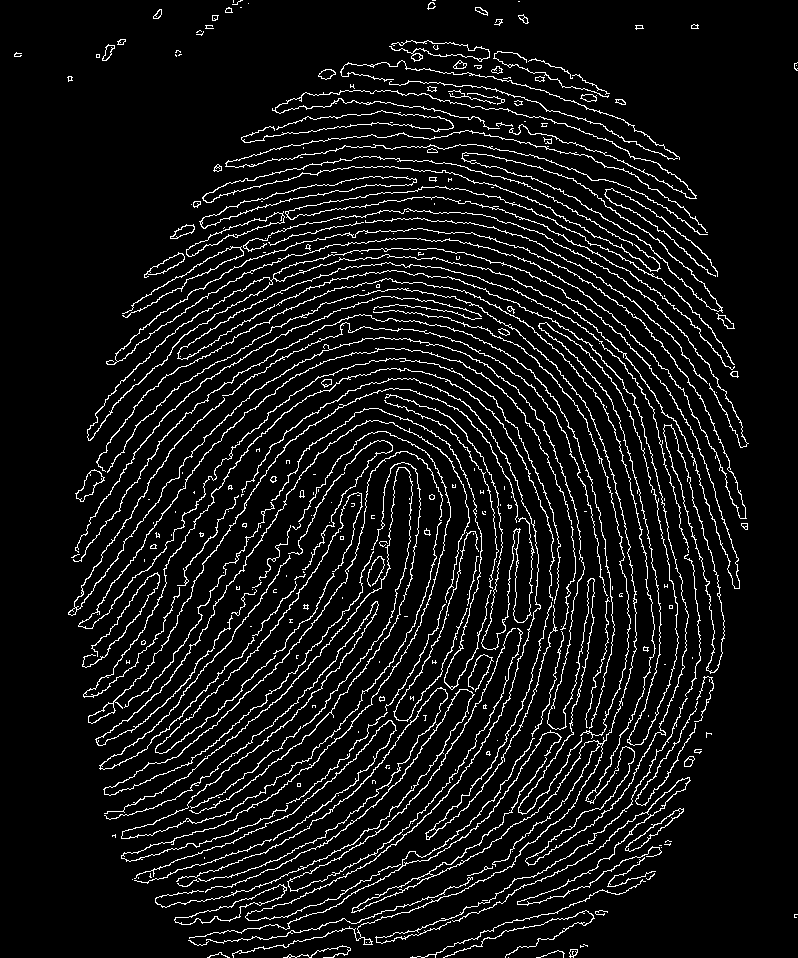

In [0]:
finger = cv2.imread("/content/drive/My Drive/Ramis/Academics/Semester 6/Digital Image Processing/Labs/Lab 8/fingerprint.tif", 0)
print("\nOriginal fingerprint image: \n")
cv2_imshow(finger)

#applying Canny edge detection to fingerprint
#after experimenting with different threshold values
print("\nOriginal fingerprint image: \n")
fingerCanny = cv2.Canny(finger, 125, 210)
cv2_imshow(fingerCanny)

```
The CT Scan threshold values were difficult to determine due to the visually detailed cortex portion of the brain.

I even tried trying a higher low threshold value and lower high threshold value which yielded similar results.

The fingerprint image was brilliantly edge detected by the Canny algorithm (partly because of the favourable background and 
foreground distinction).
```